# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry

In [3]:
# %pip install pycountry --- Used to convert country name to country iso code

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [5]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [6]:
df_data.head(2)

year    category                               prize  \
0  1901   Chemistry   The Nobel Prize in Chemistry 1901   
1  1901  Literature  The Nobel Prize in Literature 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   

  laureate_type                     full_name  birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30  Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16      Paris   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   
1        France                France  Male                NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA

In [7]:
df_data.tail(2)

year category                            prize  \
960  2020  Physics  The Nobel Prize in Physics 2020   
961  2020  Physics  The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type        full_name  birth_date                birth_city  \
960    Individual  Reinhard Genzel  1952-03-24  Bad Homburg vor der Höhe   
961    Individual    Roger Penrose  1931-08-08                Colchester   

      birth_country birth_country_current   sex         organization_name  \
960         Germany               Germany  Male  University of California   
961  United Kingdom        United Kingdom  Male      University of Oxford   

    organization_city      organization_country  ISO  
960   Los Angeles, CA  United States of America  DEU  
961            Oxford            United Kingdom  GBR

In [8]:
df_data.sample(2)

year   category                              prize  \
626  1992    Physics    The Nobel Prize in Physics 1992   
507  1980  Chemistry  The Nobel Prize in Chemistry 1980   

                                            motivation prize_share  \
626  "for his invention and development of particle...         1/1   
507  "for their contributions concerning the determ...         1/4   

    laureate_type        full_name  birth_date  birth_city  \
626    Individual  Georges Charpak  1924-08-01   Dabrovica   
507    Individual   Walter Gilbert  1932-03-21  Boston, MA   

                birth_country     birth_country_current   sex  \
626                    Poland                    Poland  Male   
507  United States of America  United States of America  Male   

                          organization_name organization_city  \
626  École Supérieure de Physique et Chimie             Paris   
507                      Harvard University     Cambridge, MA   

         organization_country  ISO  
626                    France  POL  
507  United States of America  USA

In [9]:
df_data.describe()

year
count   962.00
mean  1,971.82
std      33.81
min   1,901.00
25%   1,948.00
50%   1,977.00
75%   2,001.00
max   2,020.00

In [10]:
print(f"The column names are {df_data.columns}")

The column names are Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')


In [11]:
print(f"The shape of df_data is{df_data.shape} and df_data contains {df_data.shape[0]} rows and {df_data.shape[1]} columns")


The shape of df_data is(962, 16) and df_data contains 962 rows and 16 columns


In [12]:
print(f" The nobel prize was first awarded in {df_data['year'].min()}")

 The nobel prize was first awarded in 1901


In [13]:
print(f"The latest year included in the dataset is {df_data['year'].max()}")

The latest year included in the dataset is 2020


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [14]:
df_data.duplicated().sum()

0

There is no duplicates 

### Check for NaN Values

In [15]:
null_exist = df_data.isnull().sum()
null_exist

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [16]:
nulls_data = {j:i for i,j in zip(null_exist,null_exist.index) if i!=0 }

In [17]:
null_data = pd.DataFrame({'Column':nulls_data.keys(),'Null_values':nulls_data.values()})

In [18]:
null_data

Column  Null_values
0             motivation           88
1             birth_date           28
2             birth_city           31
3          birth_country           28
4  birth_country_current           28
5                    sex           28
6      organization_name          255
7      organization_city          255
8   organization_country          254
9                    ISO           28

In [19]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset].head()['full_name']

24     Institut de droit international (Institute of ...
60     Bureau international permanent de la Paix (Per...
89     Comité international de la Croix Rouge (Intern...
200    Office international Nansen pour les Réfugiés ...
215    Comité international de la Croix Rouge (Intern...
Name: full_name, dtype: object

That makes sense. We also see that since the organisation's name is in the full_name column, the organisation_name column contains NaN.

In [20]:
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset].shape

(255, 5)

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [21]:
df_data['birth_date'].dtype

dtype('O')

In [22]:
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'])

#### Add a Column with the Prize Share as a Percentage

In [23]:
# Lets convert prize share column with values such as 1/2 ,1 to 50,100
def convert(x):
    val = x.split('/')
    per = round(int(val[0])/int(val[1]),4)*100
    return per

In [24]:
df_data['share_pct']=df_data['prize_share'].map(lambda x:convert(x))

In [25]:
df_data['share_pct'].dtype

dtype('float64')

In [26]:
df_data.head(2)

year    category                               prize  \
0  1901   Chemistry   The Nobel Prize in Chemistry 1901   
1  1901  Literature  The Nobel Prize in Literature 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16      Paris   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   
1        France                France  Male                NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD     100.00  
1               NaN                  NaN  FRA     100.00

In [27]:
df_data.dtypes

year                              int64
category                         object
prize                            object
motivation                       object
prize_share                      object
laureate_type                    object
full_name                        object
birth_date               datetime64[ns]
birth_city                       object
birth_country                    object
birth_country_current            object
sex                              object
organization_name                object
organization_city                object
organization_country             object
ISO                              object
share_pct                       float64
dtype: object

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [28]:
sex_count=df_data['sex'].value_counts()
sex_count

sex
Male      876
Female     58
Name: count, dtype: int64

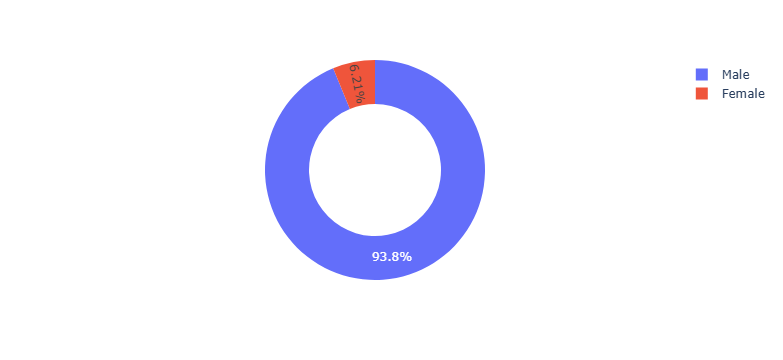

In [29]:
donut = px.pie(values=sex_count,labels=sex_count.index,names=sex_count.index,hole=0.6)
donut.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [30]:
df_data[df_data['sex']=='Female'].shape

(58, 17)

In [31]:
first_3_women = df_data[df_data['sex']=='Female'].sort_values(by='year')[:3]

In [32]:
first_3_women[['year', 'category', 'prize',  'full_name',  'birth_city',
       'birth_country', 'birth_country_current', 'sex']]

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                            full_name birth_city  \
18                        Marie Curie, née Sklodowska     Warsaw   
29  Baroness Bertha Sophie Felicita von Suttner, n...     Prague   
51                      Selma Ottilia Lovisa Lagerlöf   Mårbacka   

                       birth_country birth_country_current     sex  
18           Russian Empire (Poland)                Poland  Female  
29  Austrian Empire (Czech Republic)        Czech Republic  Female  
51                            Sweden                Sweden  Female

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [33]:
nobel_count = pd.DataFrame(df_data['full_name'].value_counts(sort=True))

In [34]:
nobel_count['full_name']=nobel_count.index

In [35]:
nobel_count[nobel_count['count']>1]

count  \
full_name                                                   
Comité international de la Croix Rouge (Interna...      3   
Frederick Sanger                                        2   
Linus Carl Pauling                                      2   
John Bardeen                                            2   
Office of the United Nations High Commissioner ...      2   
Marie Curie, née Sklodowska                             2   

                                                                                            full_name  
full_name                                                                                              
Comité international de la Croix Rouge (Interna...  Comité international de la Croix Rouge (Intern...  
Frederick Sanger                                                                     Frederick Sanger  
Linus Carl Pauling                                                                 Linus Carl Pauling  
John Bardeen                                                                             John Bardeen  
Office of the United Nations High Commissioner ...  Office of the United Nations High Commissioner...  
Marie Curie, née Sklodowska                                               Marie Curie, née Sklodowska

In [36]:
df_data[df_data.duplicated(subset=['full_name'])]

year   category                              prize  \
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
215  1944      Peace         The Nobel Peace Prize 1944   
340  1962      Peace         The Nobel Peace Prize 1962   
348  1963      Peace         The Nobel Peace Prize 1963   
424  1972    Physics    The Nobel Prize in Physics 1972   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
523  1981      Peace         The Nobel Peace Prize 1981   

                                            motivation prize_share  \
62   "in recognition of her services to the advance...         1/1   
215                                                NaN         1/1   
340                                                NaN         1/1   
348                                                NaN         1/2   
424  "for their jointly developed theory of superco...         1/3   
505  "for their contributions concerning the determ...         1/4   
523                                                NaN         1/1   

    laureate_type                                          full_name  \
62     Individual                        Marie Curie, née Sklodowska   
215  Organization  Comité international de la Croix Rouge (Intern...   
340    Individual                                 Linus Carl Pauling   
348  Organization  Comité international de la Croix Rouge (Intern...   
424    Individual                                       John Bardeen   
505    Individual                                   Frederick Sanger   
523  Organization  Office of the United Nations High Commissioner...   

    birth_date    birth_city             birth_country  \
62  1867-11-07        Warsaw   Russian Empire (Poland)   
215        NaT           NaN                       NaN   
340 1901-02-28  Portland, OR  United States of America   
348        NaT           NaN                       NaN   
424 1908-05-23   Madison, WI  United States of America   
505 1918-08-13     Rendcombe            United Kingdom   
523        NaT           NaN                       NaN   

        birth_country_current     sex  \
62                     Poland  Female   
215                       NaN     NaN   
340  United States of America    Male   
348                       NaN     NaN   
424  United States of America    Male   
505            United Kingdom    Male   
523                       NaN     NaN   

                                organization_name organization_city  \
62                            Sorbonne University             Paris   
215                                           NaN               NaN   
340  California Institute of Technology (Caltech)      Pasadena, CA   
348                                           NaN               NaN   
424                        University of Illinois        Urbana, IL   
505           MRC Laboratory of Molecular Biology         Cambridge   
523                                           NaN               NaN   

         organization_country  ISO  share_pct  
62                     France  POL     100.00  
215                       NaN  NaN     100.00  
340  United States of America  USA     100.00  
348                       NaN  NaN      50.00  
424  United States of America  USA      33.33  
505            United Kingdom  GBR      25.00  
523                       NaN  NaN     100.00

In [37]:
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
print(f'There are {multiple_winners.full_name.nunique()}' \
      ' winners who were awarded the prize more than once.')

There are 6 winners who were awarded the prize more than once.


In [38]:
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

year   category laureate_type  \
18   1903    Physics    Individual   
62   1911  Chemistry    Individual   
89   1917      Peace  Organization   
215  1944      Peace  Organization   
278  1954  Chemistry    Individual   
283  1954      Peace  Organization   
297  1956    Physics    Individual   
306  1958  Chemistry    Individual   
340  1962      Peace    Individual   
348  1963      Peace  Organization   
424  1972    Physics    Individual   
505  1980  Chemistry    Individual   
523  1981      Peace  Organization   

                                             full_name  
18                         Marie Curie, née Sklodowska  
62                         Marie Curie, née Sklodowska  
89   Comité international de la Croix Rouge (Intern...  
215  Comité international de la Croix Rouge (Intern...  
278                                 Linus Carl Pauling  
283  Office of the United Nations High Commissioner...  
297                                       John Bardeen  
306                                   Frederick Sanger  
340                                 Linus Carl Pauling  
348  Comité international de la Croix Rouge (Intern...  
424                                       John Bardeen  
505                                   Frederick Sanger  
523  Office of the United Nations High Commissioner...

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [39]:
category_based_prize = df_data['category'].value_counts()

In [40]:
category_based_prize

category
Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: count, dtype: int64

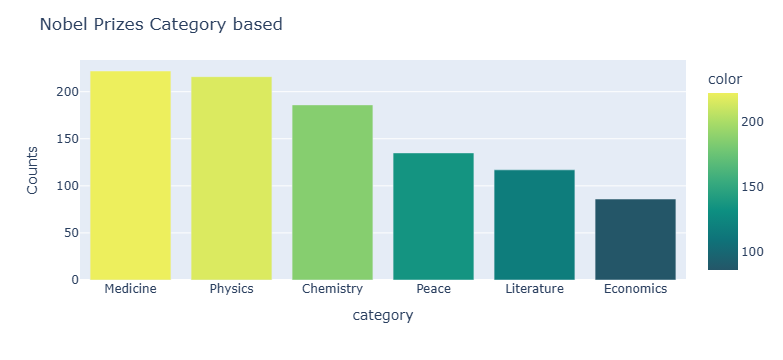

In [41]:

bar = px.bar(data_frame=category_based_prize,
             x=category_based_prize.index,
             y=category_based_prize.values,
             color=category_based_prize.values,
             color_continuous_scale='Aggrnyl'
            )
bar.update_layout(
    title="Nobel Prizes Category based",
    yaxis_title="Counts"
)
bar.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [42]:
df_data[df_data['category']=='Economics'].sort_values(by='year').head(3)

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
394  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
402  1970  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   
394  "for having developed and applied dynamic mode...         1/2   
402  "for the scientific work through which he has ...         1/1   

    laureate_type          full_name birth_date birth_city  \
393    Individual      Jan Tinbergen 1903-04-12  the Hague   
394    Individual      Ragnar Frisch 1895-03-03       Oslo   
402    Individual  Paul A. Samuelson 1915-05-15   Gary, IN   

                birth_country     birth_country_current   sex  \
393               Netherlands               Netherlands  Male   
394                    Norway                    Norway  Male   
402  United States of America  United States of America  Male   

                               organization_name organization_city  \
393          The Netherlands School of Economics         Rotterdam   
394                           University of Oslo              Oslo   
402  Massachusetts Institute of Technology (MIT)     Cambridge, MA   

         organization_country  ISO  share_pct  
393               Netherlands  NLD      50.00  
394                    Norway  NOR      50.00  
402  United States of America  USA     100.00

In [43]:
df_data[df_data['birth_country']=='India']

year    category                                              prize  \
8    1902    Medicine     The Nobel Prize in Physiology or Medicine 1902   
75   1913  Literature                 The Nobel Prize in Literature 1913   
155  1930     Physics                    The Nobel Prize in Physics 1930   
386  1968    Medicine     The Nobel Prize in Physiology or Medicine 1968   
689  1998   Economics  The Sveriges Riksbank Prize in Economic Scienc...   
818  2009   Chemistry                  The Nobel Prize in Chemistry 2009   
884  2014       Peace                         The Nobel Peace Prize 2014   
939  2019   Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
8    "for his work on malaria, by which he has show...         1/1   
75   "because of his profoundly sensitive, fresh an...         1/1   
155  "for his work on the scattering of light and f...         1/1   
386  "for their interpretation of the genetic code ...         1/3   
689       "for his contributions to welfare economics"         1/1   
818  "for studies of the structure and function of ...         1/3   
884  "for their struggle against the suppression of...         1/2   
939  “for their experimental approach to alleviatin...         1/3   

    laureate_type                         full_name birth_date  \
8      Individual                       Ronald Ross 1857-05-13   
75     Individual               Rabindranath Tagore 1861-05-07   
155    Individual  Sir Chandrasekhara Venkata Raman 1888-11-07   
386    Individual                Har Gobind Khorana 1922-01-09   
689    Individual                       Amartya Sen 1933-11-03   
818    Individual          Venkatraman Ramakrishnan 1952-07-02   
884    Individual                 Kailash Satyarthi 1954-01-11   
939    Individual                  Abhijit Banerjee 1961-02-21   

                  birth_city birth_country birth_country_current   sex  \
8                     Almora         India                 India  Male   
75                  Calcutta         India                 India  Male   
155          Tiruchirappalli         India                 India  Male   
386                   Raipur         India                 India  Male   
689             Santiniketan         India                 India  Male   
818  Chidambaram, Tamil Nadu         India                 India  Male   
884                  Vidisha         India                 India  Male   
939                   Mumbai         India                 India  Male   

                               organization_name organization_city  \
8                      University College London         Liverpool   
75                                           NaN               NaN   
155                          Calcutta University          Calcutta   
386                      University of Wisconsin       Madison, WI   
689                      University of Cambridge         Cambridge   
818          MRC Laboratory of Molecular Biology         Cambridge   
884                                          NaN               NaN   
939  Massachusetts Institute of Technology (MIT)     Cambridge, MA   

         organization_country  ISO  share_pct  
8              United Kingdom  IND     100.00  
75                        NaN  IND     100.00  
155                     India  IND     100.00  
386  United States of America  IND      33.33  
689            United Kingdom  IND     100.00  
818            United Kingdom  IND      33.33  
884                       NaN  IND      50.00  
939  United States of America  IND      33.33

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [44]:
d=df_data.groupby(['category','sex']).count()['year'][::-1]

In [45]:
d

category    sex   
Physics     Male      212
            Female      4
Peace       Male       90
            Female     17
Medicine    Male      210
            Female     12
Literature  Male      101
            Female     16
Economics   Male       84
            Female      2
Chemistry   Male      179
            Female      7
Name: year, dtype: int64

In [46]:
d.index.get_level_values(1)

Index(['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Female'],
      dtype='object', name='sex')

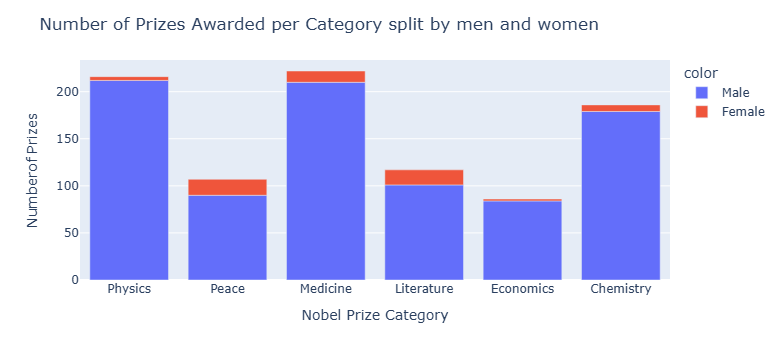

In [47]:
fig = px.bar(x=d.index.get_level_values(0),
       y=d,
       color=d.index.get_level_values(1))

fig.update_layout(
    title="Number of Prizes Awarded per Category split by men and women",
    xaxis_title="Nobel Prize Category",
    yaxis_title="Numberof Prizes"
)

In [48]:
cat_men_women = df_data.groupby(['category', 'sex'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women

category     sex  prize
11     Physics    Male    212
7     Medicine    Male    210
1    Chemistry    Male    179
5   Literature    Male    101
9        Peace    Male     90
3    Economics    Male     84
8        Peace  Female     17
4   Literature  Female     16
6     Medicine  Female     12
0    Chemistry  Female      7
10     Physics  Female      4
2    Economics  Female      2

For physics women got 4 prizes and for literature women got 16 prizes

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [49]:
year_per_prize = df_data.groupby(['year']).agg({'prize':pd.Series.count})

In [50]:
rolling_year_per_prize = year_per_prize.rolling(5).mean()

In [51]:
rolling_year_per_prize.head(10)

prize
year       
1901    NaN
1902    NaN
1903    NaN
1904    NaN
1905   6.20
1906   6.20
1907   6.00
1908   6.00
1909   6.20
1910   6.20

In [52]:
np.arange(1900,2025,step=5)

array([1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950,
       1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005,
       2010, 2015, 2020])

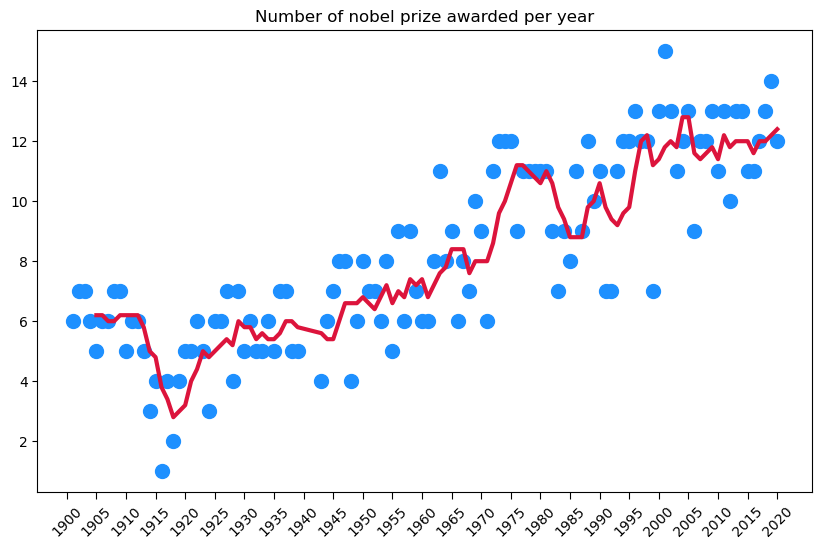

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(year_per_prize.index,
            year_per_prize,
            s=100,
            c='dodgerblue'
        
           )
plt.title('Number of nobel prize awarded per year')
plt.xticks(np.arange(1900,2025,step=5))

plt.tick_params(axis='x',length=5,labelrotation=45)

plt.plot(rolling_year_per_prize.index,
         rolling_year_per_prize,
         color='crimson',
         linewidth=3)

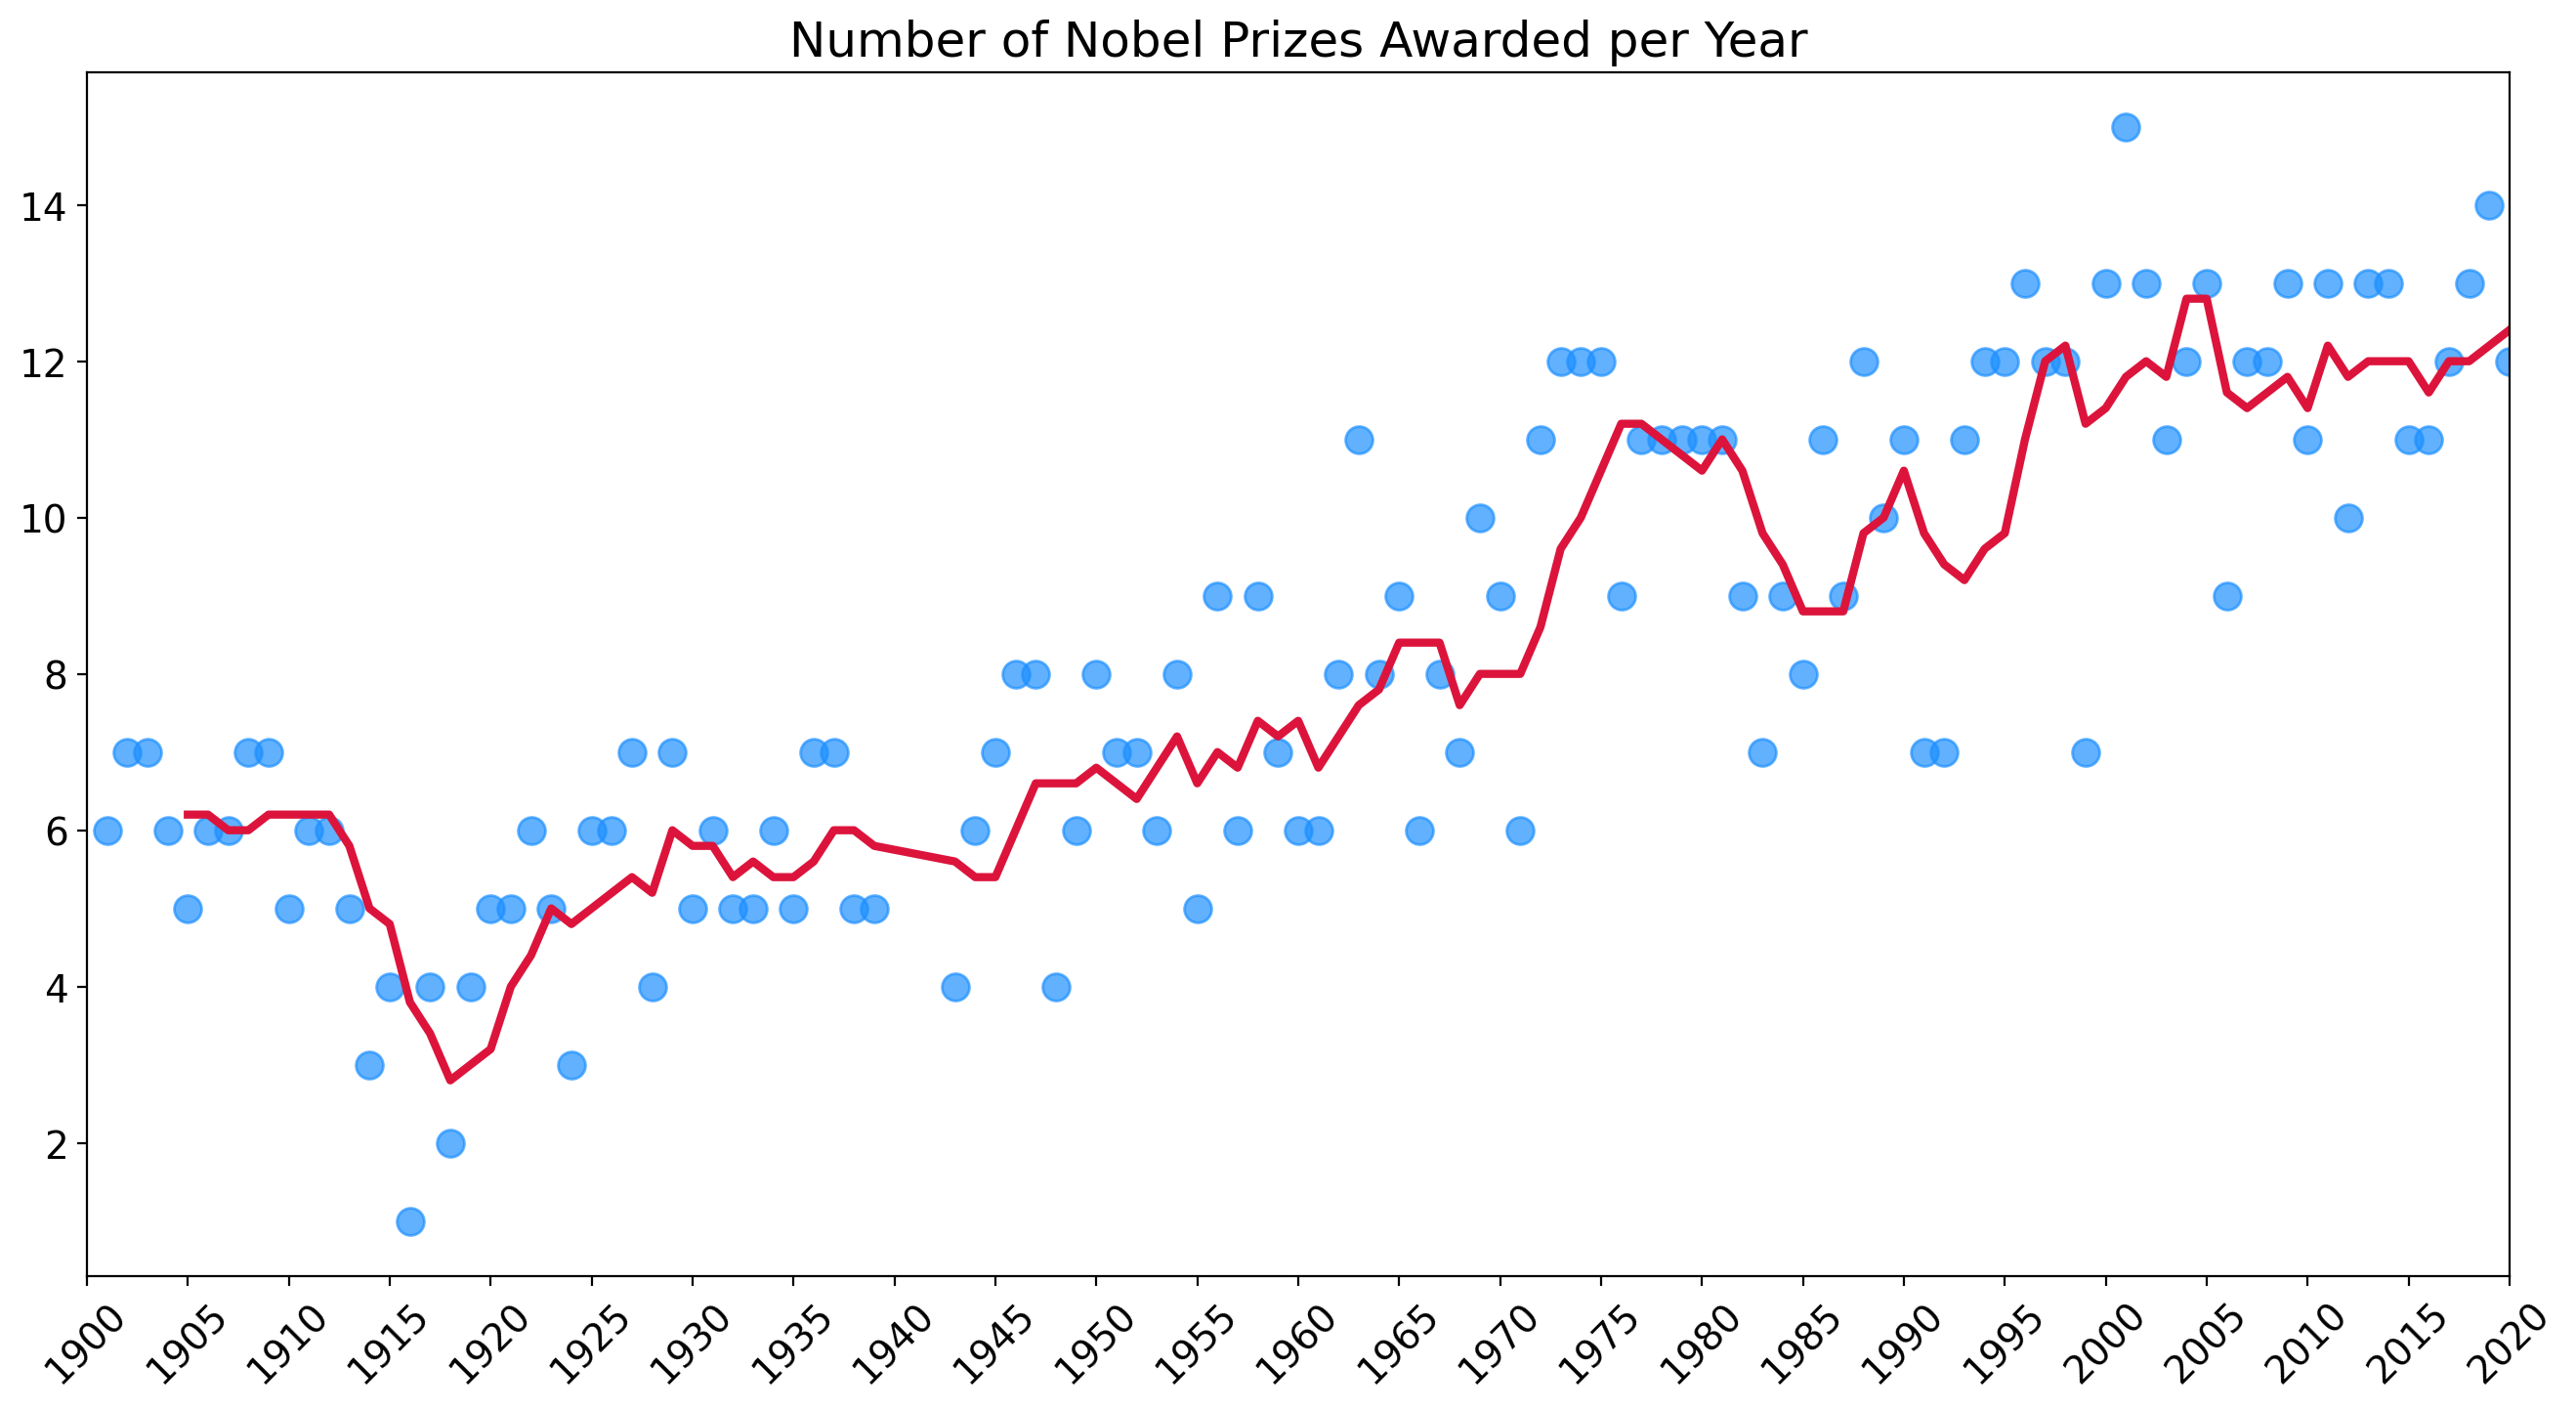

In [54]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=year_per_prize.index, 
           y=year_per_prize.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(rolling_year_per_prize.index, 
        rolling_year_per_prize.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [55]:
average_prize_share = df_data.groupby('year').agg({'share_pct':pd.Series.mean})

In [56]:
rolled_average_prize_share = average_prize_share.rolling(window=5).mean()

In [57]:
rolled_average_prize_share

share_pct
year           
1901        NaN
1902        NaN
1903        NaN
1904        NaN
1905      81.90
...         ...
2016      52.28
2017      50.28
2018      50.28
2019      49.62
2020      48.71

[117 rows x 1 columns]

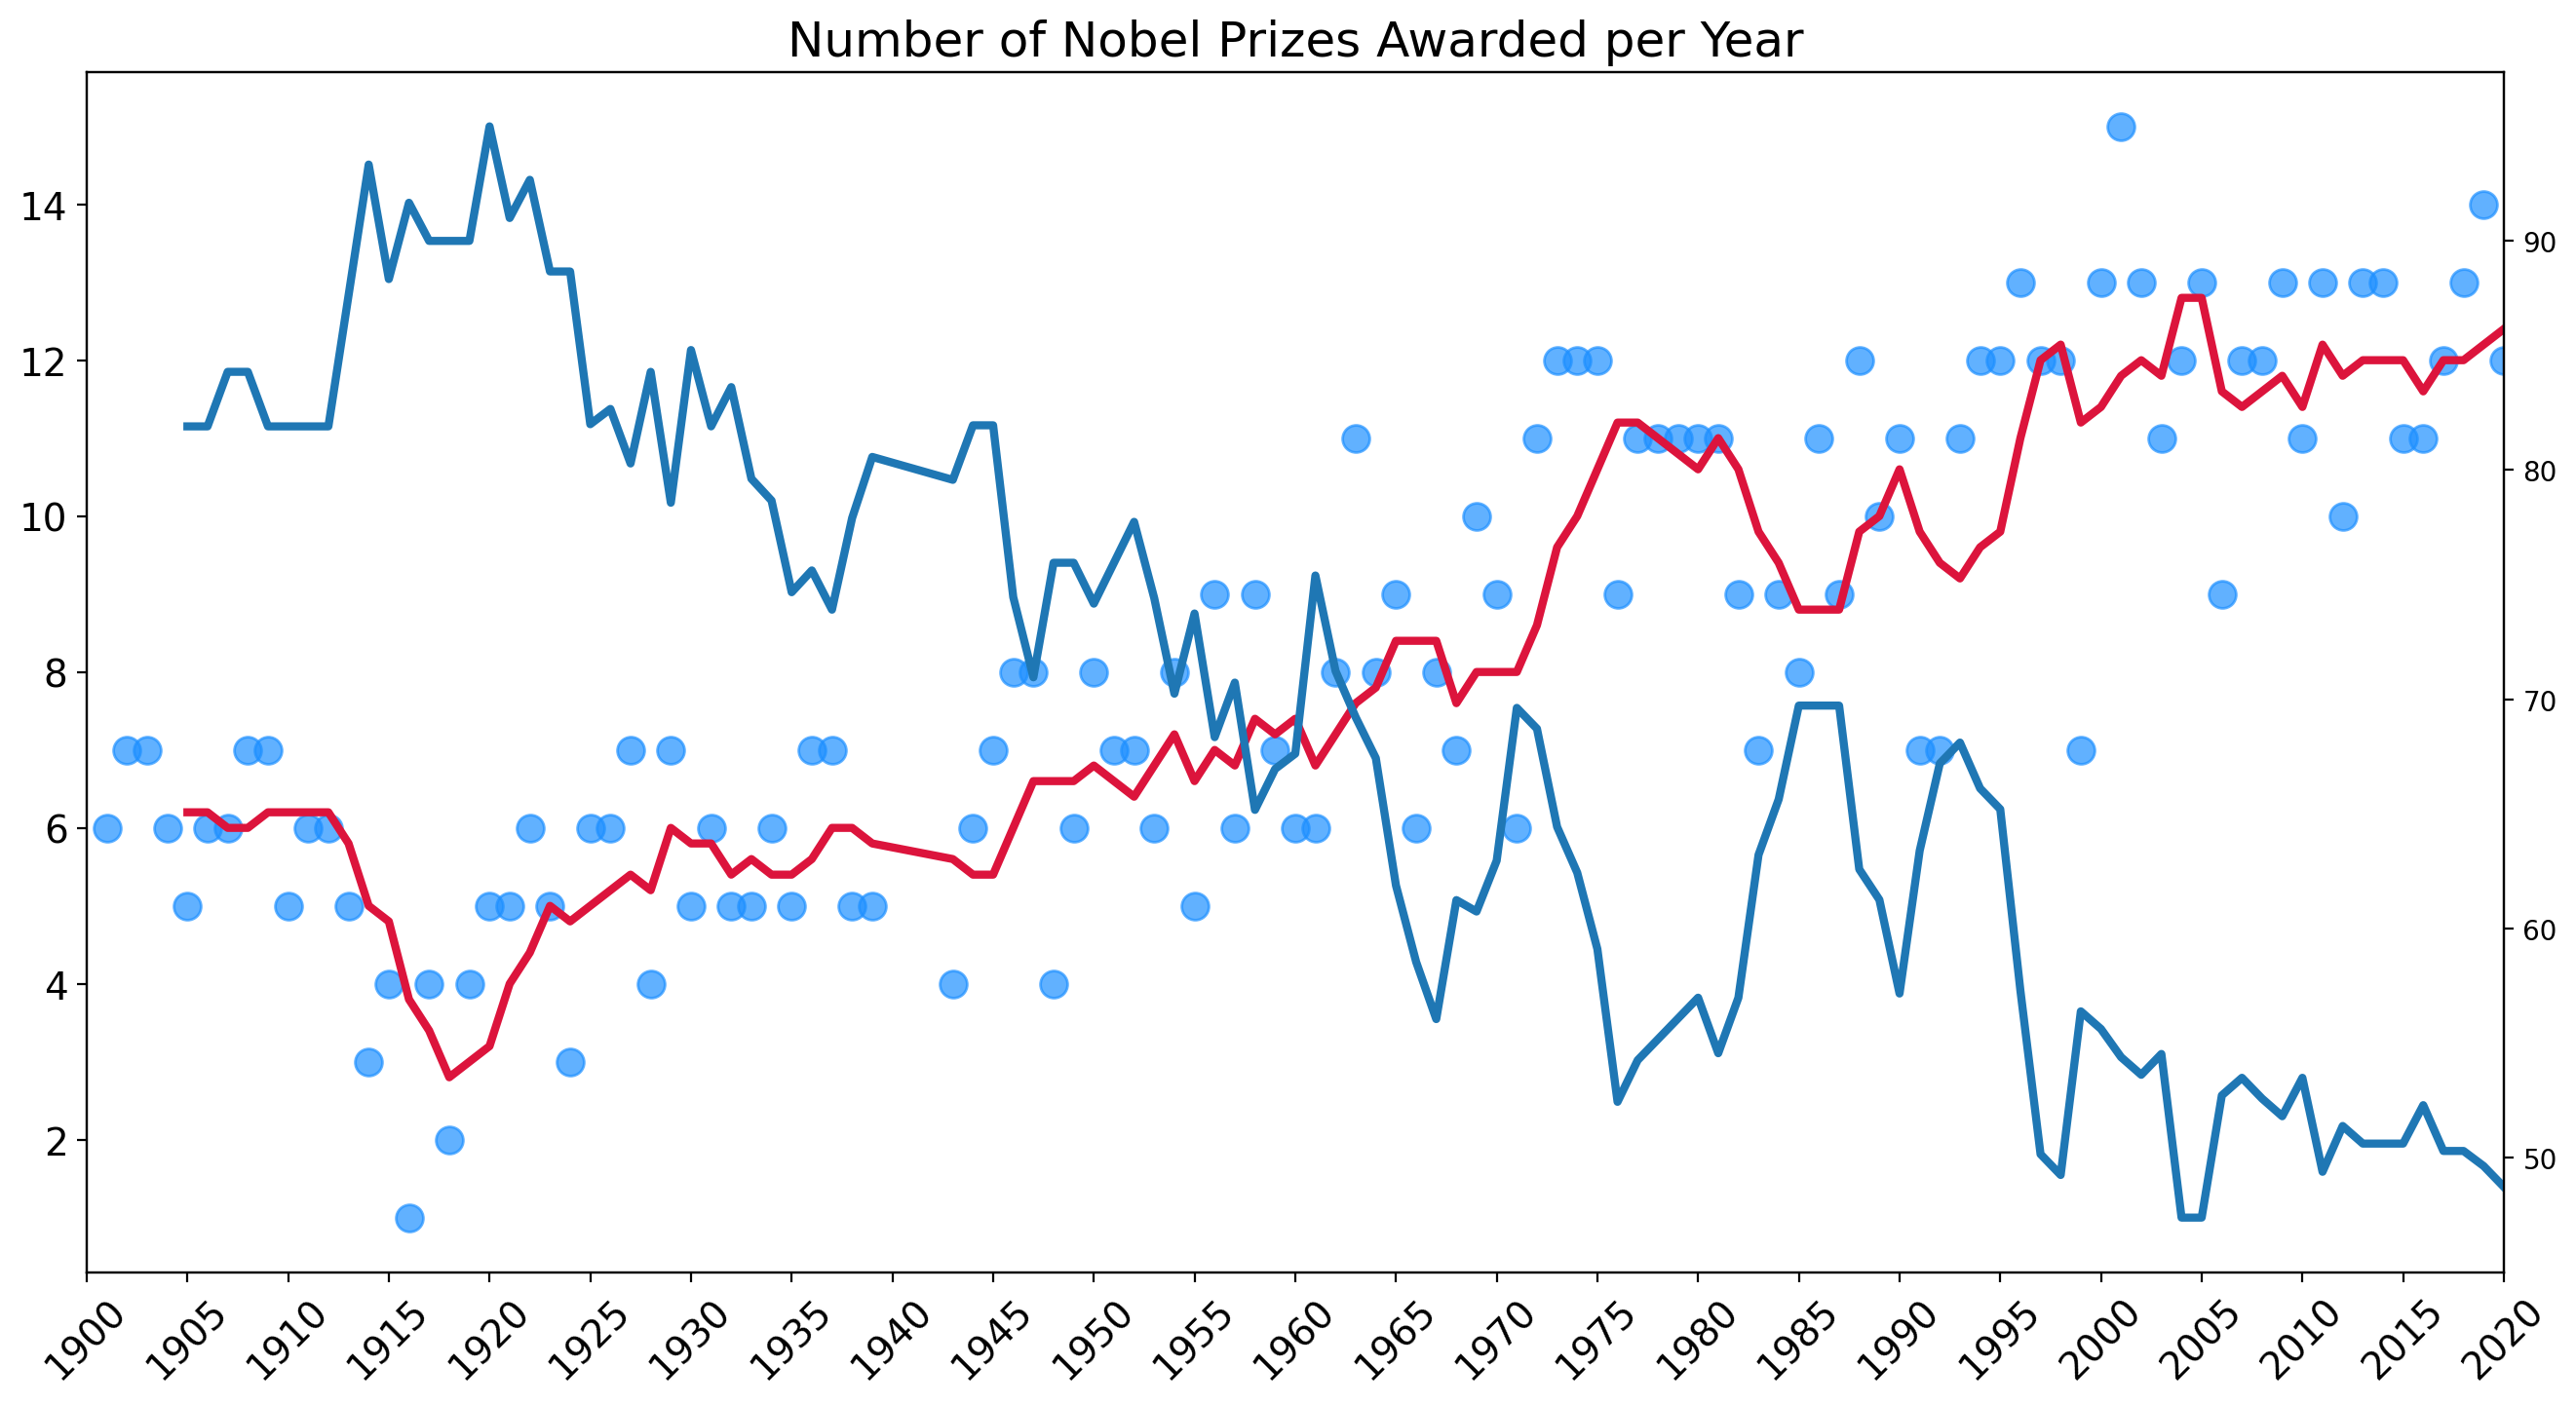

In [58]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax1=ax.twinx()
ax.set_xlim(1900, 2020)
 
ax.scatter(x=year_per_prize.index, 
           y=year_per_prize.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(rolling_year_per_prize.index, 
        rolling_year_per_prize.values, 
        c='crimson', 
        linewidth=3,)

# ax1.invert_yaxis()

ax1.plot(rolled_average_prize_share.index,
         rolled_average_prize_share,
         linewidth=3)
plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [59]:
top20_countries = df_data.groupby('birth_country_current',as_index=False).agg({'prize':pd.Series.count}).sort_values(by='prize')[-20:]

In [60]:
top20_countries

birth_country_current  prize
7                    Belgium      9
31                   Hungary      9
33                     India      9
2                  Australia     10
20                   Denmark     12
54                    Norway     12
13                     China     12
51               Netherlands     18
3                    Austria     18
39                     Italy     19
68               Switzerland     19
11                    Canada     20
61                    Russia     26
40                     Japan     27
57                    Poland     27
67                    Sweden     29
25                    France     57
26                   Germany     84
73            United Kingdom    105
74  United States of America    281

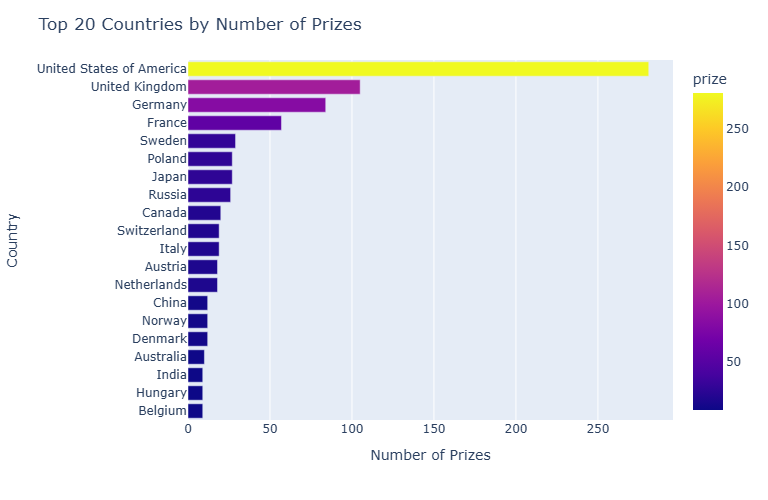

In [61]:

fig = px.bar(data_frame=top20_countries,
            y='birth_country_current',
            x='prize',
            height=500,
            width=900,
            color='prize'
            )
fig.update_layout(title_text='Top 20 Countries by Number of Prizes',
                 xaxis_title="Number of Prizes",
                 yaxis_title="Country")
fig.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [62]:
top_countries = df_data.groupby(['birth_country_current','ISO'],as_index=False).agg({'prize':pd.Series.count}).sort_values(by='prize')

In [63]:
top_countries.sort_values(by='prize')

birth_country_current  ISO  prize
78                  Zimbabwe  ZWE      1
36                      Iraq  IRQ      1
59     Republic of Macedonia  MKD      1
10                  Bulgaria  BGR      1
9                     Brazil  BRA      1
..                       ...  ...    ...
67                    Sweden  SWE     29
25                    France  FRA     57
26                   Germany  DEU     84
73            United Kingdom  GBR    105
74  United States of America  USA    281

[79 rows x 3 columns]

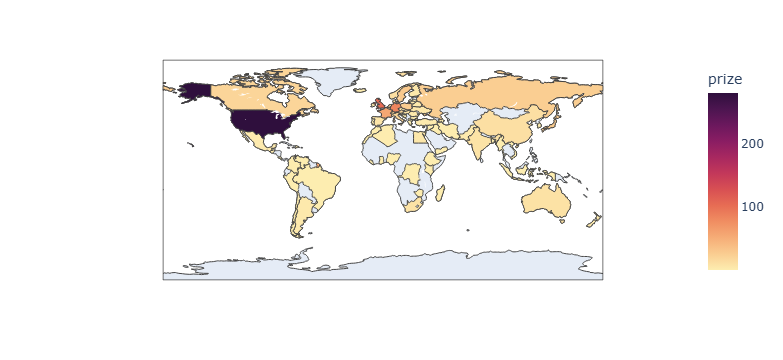

In [64]:
fig = px.choropleth(data_frame=top_countries, locations='ISO',
                    color="prize", # lifeExp is a column of gapminder
                    hover_name="birth_country_current", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.matter)
fig.update_layout(coloraxis_showscale=True)
fig.show()

In [65]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'], 
                               as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)

birth_country_current  ISO  prize
74  United States of America  USA    281
73            United Kingdom  GBR    105
26                   Germany  DEU     84
25                    France  FRA     57
67                    Sweden  SWE     29
..                       ...  ...    ...
32                   Iceland  ISL      1
47                Madagascar  MDG      1
34                 Indonesia  IDN      1
36                      Iraq  IRQ      1
78                  Zimbabwe  ZWE      1

[79 rows x 3 columns]

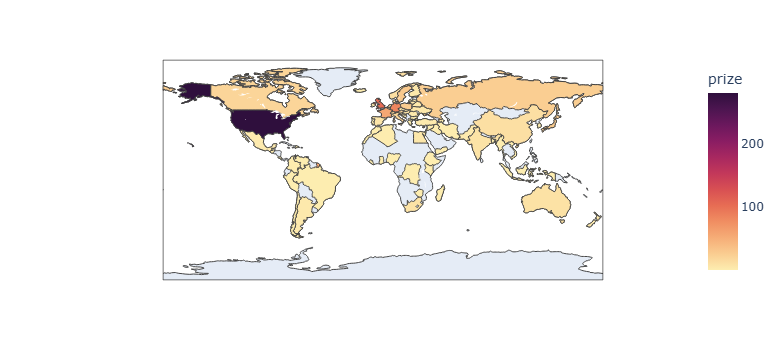

In [66]:
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

In [67]:
top_countries.head()

birth_country_current  ISO  prize
78              Zimbabwe  ZWE      1
77                 Yemen  YEM      1
32               Iceland  ISL      1
41                 Kenya  KEN      1
29     Guadeloupe Island  GLP      1

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [68]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct'],
      dtype='object')

In [69]:
df = df_data.groupby(['birth_country_current', 'category'],as_index=False).count()[['birth_country_current', 'category','year']]

In [70]:
df = df.rename(columns={'year':'cat_prize'})

In [71]:
country_wise = df.groupby('birth_country_current').agg({'cat_prize':pd.Series.sum})

In [72]:
country_wise.loc['United States of America'].values[0]

281

In [73]:
df['total_prize'] = df['birth_country_current'].map(lambda x:country_wise.loc[x].values[0])

In [74]:
df = df.sort_values(by='total_prize')

In [75]:
df[df['birth_country_current']=='India']

birth_country_current    category  cat_prize  total_prize
89                 India   Economics          2            9
90                 India  Literature          2            9
91                 India    Medicine          2            9
92                 India       Peace          1            9
93                 India     Physics          1            9
88                 India   Chemistry          1            9

In [76]:
df[df['birth_country_current']=='Australia']

birth_country_current   category  cat_prize  total_prize
5             Australia   Medicine          7           10
4             Australia  Chemistry          1           10
6             Australia    Physics          2           10

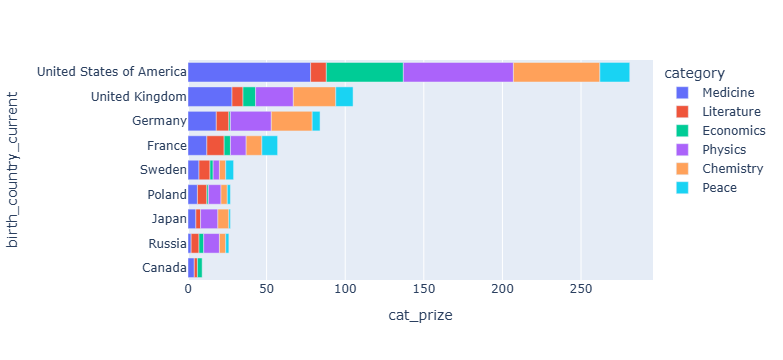

In [77]:
fig = px.bar(
    data_frame=df[-50:],
    x='cat_prize',
    y='birth_country_current',
    color='category'
)

fig.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [78]:
year_wise_country=df_data.groupby(['year','birth_country_current'],as_index=False).agg({'ISO':pd.Series.count})

In [79]:
year_wise_country=year_wise_country.rename(columns={'ISO':'Prize'})

In [80]:
year_wise_country.columns

Index(['year', 'birth_country_current', 'Prize'], dtype='object')

In [81]:
year_wise_country['cumsum']=year_wise_country.groupby('birth_country_current')['Prize'].cumsum()

In [82]:
year_wise_country[year_wise_country['birth_country_current']=='France'].head()

year birth_country_current  Prize  cumsum
0   1901                France      2       2
10  1903                France      2       4
15  1904                France      1       5
23  1906                France      1       6
28  1907                France      2       8

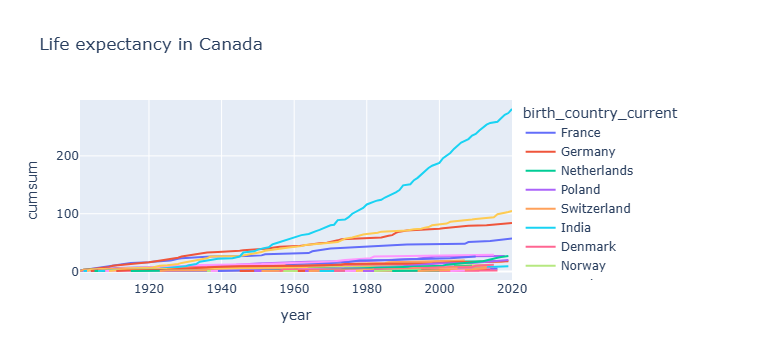

In [83]:
fig = px.line(year_wise_country,
              x="year",
              y='cumsum',
              color='birth_country_current',
              title='Life expectancy in Canada')
fig.show()

In [84]:
year_wise_country[year_wise_country['year']==1951]

year     birth_country_current  Prize  cumsum
204  1951                    France      1      28
205  1951                   Ireland      1       3
206  1951              South Africa      1       1
207  1951                    Sweden      1      13
208  1951            United Kingdom      1      34
209  1951  United States of America      2      40

In [85]:
# Calculate the cumulative number of prizes won by each country in every year. Again, use the birth_country_current of the winner to calculate this.
year_wise_country.head()

year birth_country_current  Prize  cumsum
0  1901                France      2       2
1  1901               Germany      1       1
2  1901           Netherlands      1       1
3  1901                Poland      1       1
4  1901           Switzerland      1       1

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [86]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD     100.00  
1               NaN                  NaN  FRA     100.00  
2           Marburg              Germany  POL     100.00  
3               NaN                  NaN  FRA      50.00  
4               NaN                  NaN  CHE      50.00

In [87]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct'],
      dtype='object')

In [88]:
df_data['organization_name'].unique()

array(['Berlin University', nan, 'Marburg University',
       'Munich University', 'University College London',
       'Leiden University', 'Amsterdam University',
       'Stockholm University', 'Finsen Medical Light Institute',
       'École Polytechnique',
       'École municipale de physique et de chimie industrielles (Municipal School of Industrial Physics and Chemistry)',
       'Military Medical Academy', 'Royal Institution of Great Britain',
       'Institute for Infectious Diseases', 'Kiel University',
       'Sorbonne University', 'Pavia University', 'Madrid University',
       'University of Cambridge',
       'Landwirtschaftliche Hochschule (Agricultural College)',
       'Institut Pasteur', 'University of Chicago', 'Victoria University',
       'Goettingen University', 'Leipzig University', 'Berne University',
       'Marconi Wireless Telegraph Co. Ltd.', 'Strasbourg University',
       'University of Heidelberg', 'Uppsala University',
       'Würzburg University', 'Toulous

In [89]:
Top_Research_Organisations = df_data.groupby('organization_name',as_index=False).agg({'prize':pd.Series.count}).sort_values('prize')[-20:]

In [90]:
Top_Research_Organisations

organization_name  prize
79                               Institut Pasteur      7
109                             London University      7
67                         Harvard Medical School      7
192                     University College London      7
40                             Cornell University      8
12                              Bell Laboratories      8
258                               Yale University      9
111           MRC Laboratory of Molecular Biology     10
222                          University of Oxford     12
152                        Rockefeller University     13
119                           Max-Planck-Institut     13
146                          Princeton University     15
38                            Columbia University     17
26   California Institute of Technology (Caltech)     17
197                       University of Cambridge     18
198                         University of Chicago     20
117   Massachusetts Institute of Technology (MIT)     21
167                           Stanford University     23
68                             Harvard University     29
196                      University of California     40

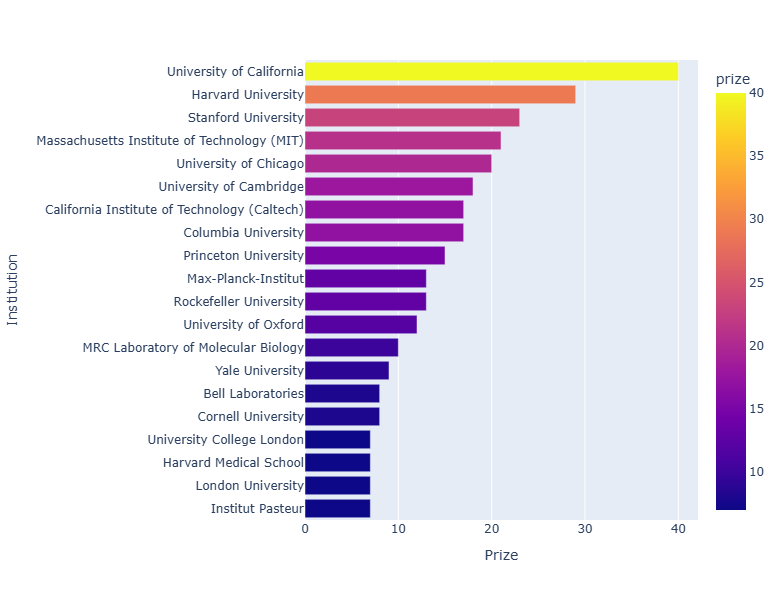

In [91]:
fig = px.bar(Top_Research_Organisations, x='prize', y='organization_name',
             color='prize',
             height=600)
fig.update_layout(
                xaxis_title='Prize',
                yaxis_title='Institution'
                    )
fig.show()

In [92]:
# Which organisations make up the top 20?
Top_Research_Organisations['organization_name'].unique()

array(['Institut Pasteur', 'London University', 'Harvard Medical School',
       'University College London', 'Cornell University',
       'Bell Laboratories', 'Yale University',
       'MRC Laboratory of Molecular Biology', 'University of Oxford',
       'Rockefeller University', 'Max-Planck-Institut',
       'Princeton University', 'Columbia University',
       'California Institute of Technology (Caltech)',
       'University of Cambridge', 'University of Chicago',
       'Massachusetts Institute of Technology (MIT)',
       'Stanford University', 'Harvard University',
       'University of California'], dtype=object)

In [93]:
# How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?
Top_Research_Organisations[Top_Research_Organisations['organization_name']=='University of Chicago']

organization_name  prize
198  University of Chicago     20

In [94]:
Top_Research_Organisations[Top_Research_Organisations['organization_name']=='Harvard University']

organization_name  prize
68  Harvard University     29

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [95]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct'],
      dtype='object')

In [96]:
top_20_organisation_cities =df_data.groupby('organization_city',as_index=False).agg({'prize':pd.Series.count}).sort_values('prize')[-20:]

In [97]:
top_20_organisation_cities['organization_city'].unique()

array(['Göttingen', 'Zurich', 'Heidelberg', 'New Haven, CT', 'Munich',
       'Boston, MA', 'Moscow', 'Stockholm', 'Oxford', 'Berlin',
       'Pasadena, CA', 'Princeton, NJ', 'Chicago, IL', 'Berkeley, CA',
       'Stanford, CA', 'Paris', 'London', 'Cambridge', 'New York, NY',
       'Cambridge, MA'], dtype=object)

In [98]:
top_20_organisation_cities.columns

Index(['organization_city', 'prize'], dtype='object')

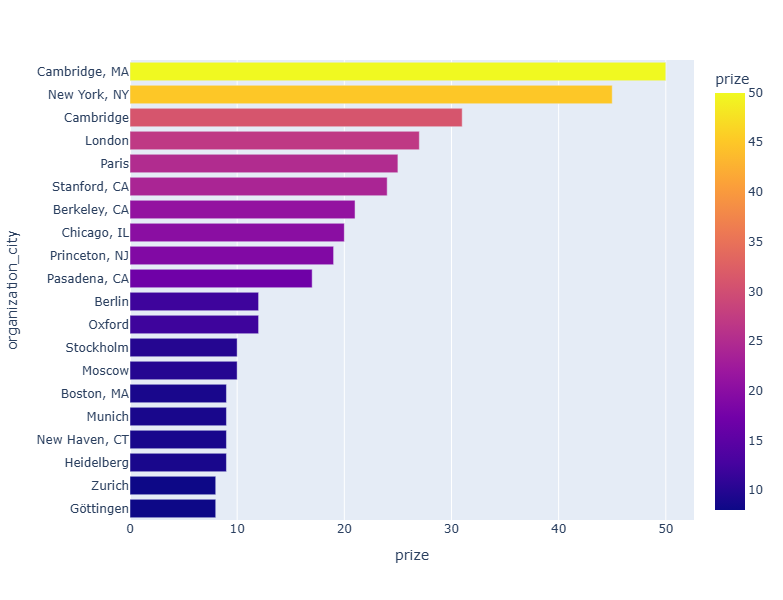

In [99]:
px.bar(data_frame=top_20_organisation_cities,
      x='prize',
      y='organization_city',
      color='prize',
       height=600
      )

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [100]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct'],
      dtype='object')

In [101]:
top_20_birth_cities = df_data.groupby('birth_city',as_index=False).agg({'prize':pd.Series.count}).sort_values('prize')[-20:]

In [102]:
top_20_birth_cities

birth_city  prize
343          Milwaukee, WI      3
87                   Cairo      4
356               Montreal      4
428         Pittsburgh, PA      4
167  Frankfurt-on-the-Main      5
440                 Prague      5
515              Stockholm      6
210                Hamburg      6
363                 Munich      7
358                 Moscow      7
590         Washington, DC      8
64              Boston, MA      8
76            Brooklyn, NY      8
80                Budapest      8
48                  Berlin     11
112            Chicago, IL     12
572                 Vienna     14
313                 London     19
418                  Paris     26
382           New York, NY     53

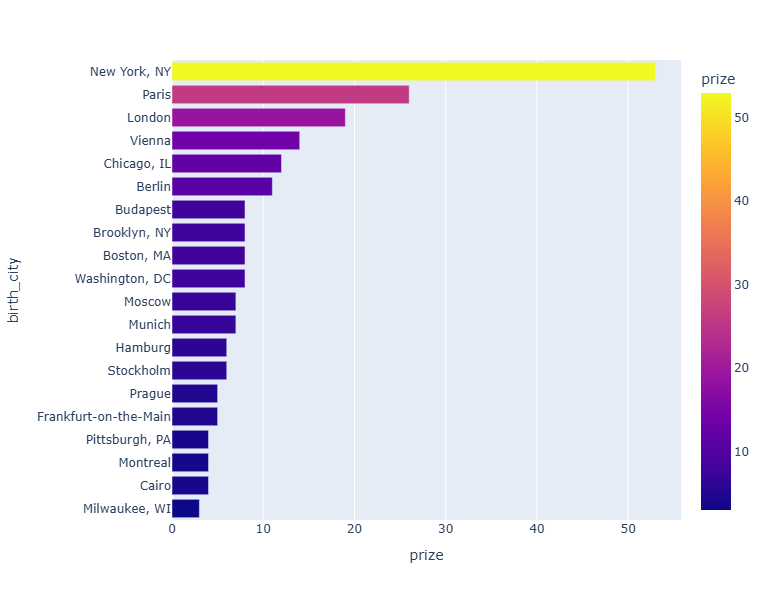

In [103]:
px.bar(data_frame=top_20_birth_cities,
      x='prize',
      y='birth_city',
      color='prize',
       height=600,
       color_continuous_scale=px.colors.sequential.Plasma
   
      )

In [104]:
# What percentage of the United States prizes came from Nobel laureates born in New York?
(53/281)*100

18.86120996441281

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [105]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct'],
      dtype='object')

In [106]:
number_of_prizes_by_organisation=df_data.groupby(['birth_country_current','organization_name','birth_city'],as_index=False).agg({'prize':pd.Series.count}).sort_values('prize')

In [107]:
number_of_prizes_by_organisation

birth_country_current                             organization_name  \
0                     Algeria                             Collège de France   
419            United Kingdom                       University of Cambridge   
421            United Kingdom                       University of Cambridge   
422            United Kingdom                       University of Cambridge   
423            United Kingdom                       University of Cambridge   
..                        ...                                           ...   
524  United States of America   Massachusetts Institute of Technology (MIT)   
609  United States of America                         University of Chicago   
559  United States of America                        Rockefeller University   
453  United States of America  California Institute of Technology (Caltech)   
496  United States of America                            Harvard University   

       birth_city  prize  
0     Constantine      1  
419         Leeds      1  
421     Minnigaff      1  
422     Rendcombe      1  
423       Swanage      1  
..            ...    ...  
524  New York, NY      3  
609    Boston, MA      3  
559  New York, NY      3  
453  New York, NY      4  
496  New York, NY      9  

[658 rows x 4 columns]

In [108]:
number_of_prizes_by_organisation.columns

Index(['birth_country_current', 'organization_name', 'birth_city', 'prize'], dtype='object')

In [109]:
fig = px.sunburst(number_of_prizes_by_organisation,
                  path=['birth_country_current', 'organization_name', 'birth_city'],
                  values='prize', color='birth_country_current',
                 width=800,
                 height=800)
fig.show()

In [110]:
country_city_org = df_data.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
 
country_city_org = country_city_org.sort_values('prize', ascending=False)

In [111]:
burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values='prize',
                    title='Where do Discoveries Take Place?',
                   )
 
burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [112]:
df_data['birth_year']=pd.DatetimeIndex(df_data['birth_date']).year

In [113]:
df_data['winning_age']=df_data['year']-df_data['birth_year']

In [121]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  birth_year  \
0            Berlin              Germany  NLD     100.00    1,852.00   
1               NaN                  NaN  FRA     100.00    1,839.00   
2           Marburg              Germany  POL     100.00    1,854.00   
3               NaN                  NaN  FRA      50.00    1,822.00   
4               NaN                  NaN  CHE      50.00    1,828.00   

   winning_age  
0        49.00  
1        62.00  
2        47.00  
3        79.00  
4        73.00

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [114]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct',
       'birth_year', 'winning_age'],
      dtype='object')

In [115]:
df_data.loc[df_data['winning_age'].idxmax()][['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'share_pct',
       'birth_year', 'winning_age']]

year                                                               2019
category                                                      Chemistry
prize                                 The Nobel Prize in Chemistry 2019
motivation               “for the development of lithium-ion batteries”
prize_share                                                         1/3
laureate_type                                                Individual
full_name                                               John Goodenough
birth_date                                          1922-07-25 00:00:00
birth_city                                                         Jena
birth_country                                                   Germany
birth_country_current                                           Germany
sex                                                                Male
share_pct                                                         33.33
birth_year                                                     1

In [116]:
# What are the names of the youngest and oldest Nobel laureate?
df_data.loc[df_data['winning_age'].idxmin()][['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'share_pct',
       'birth_year', 'winning_age']]

year                                                                  2014
category                                                             Peace
prize                                           The Nobel Peace Prize 2014
motivation               "for their struggle against the suppression of...
prize_share                                                            1/2
laureate_type                                                   Individual
full_name                                                 Malala Yousafzai
birth_date                                             1997-07-12 00:00:00
birth_city                                                         Mingora
birth_country                                                     Pakistan
birth_country_current                                             Pakistan
sex                                                                 Female
share_pct                                                            50.00
birth_year               

In [117]:
# What did they win the prize for?
df_data.loc[df_data['winning_age'].idxmin()][['motivation']]

motivation    "for their struggle against the suppression of...
Name: 885, dtype: object

In [118]:
# What is the average age of a winner?
df_data['winning_age'].mean()

59.94860813704497

In [119]:
# 75% of laureates are younger than what age when they receive the prize?
df_data['winning_age'].quantile(0.75)

69.0

<Axes: xlabel='winning_age', ylabel='Count'>

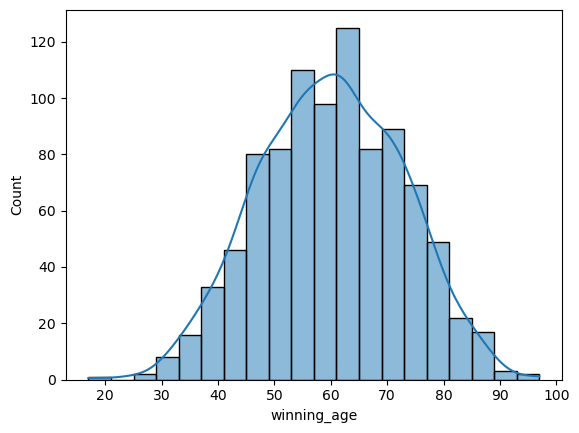

In [120]:
sns.histplot(data=df_data,x='winning_age',bins=20,kde=True)

## Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [122]:
 # Measures of Central Tendency
df_data['winning_age'].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

In [123]:
df_data['winning_age'].skew()

-0.0433997162601915

<Axes: xlabel='winning_age', ylabel='Count'>

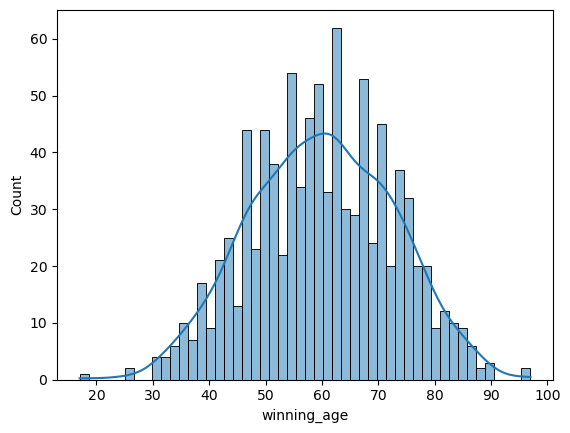

In [128]:
sns.histplot(df_data['winning_age'],bins=50,kde=True)

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


<Axes: xlabel='year', ylabel='winning_age'>

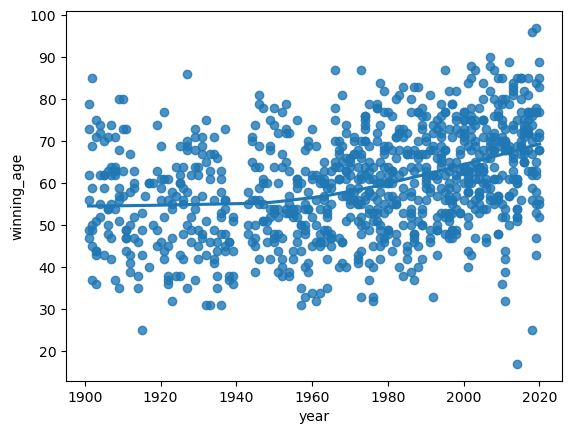

In [130]:
sns.regplot(x=df_data['year'],y=df_data['winning_age'],lowess=True)

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

<Axes: xlabel='category', ylabel='winning_age'>

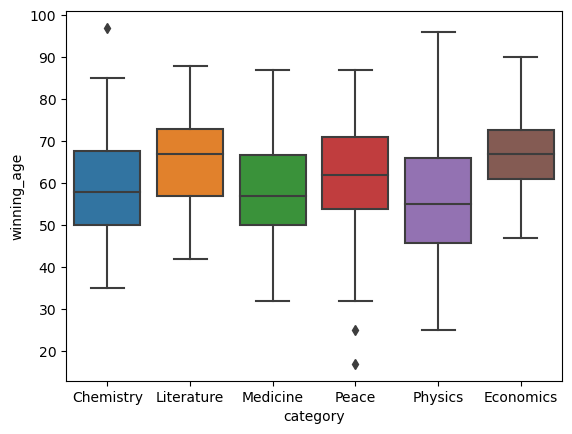

In [131]:
sns.boxplot(data=df_data,
            x='category',
            y='winning_age')

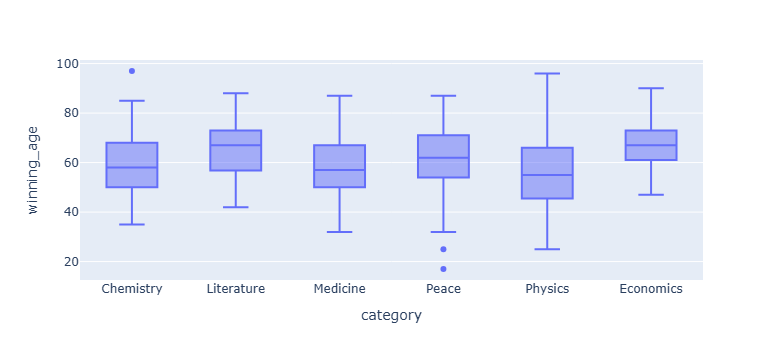

In [132]:
px.box(data_frame=df_data,
       x='category',
       y='winning_age')

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



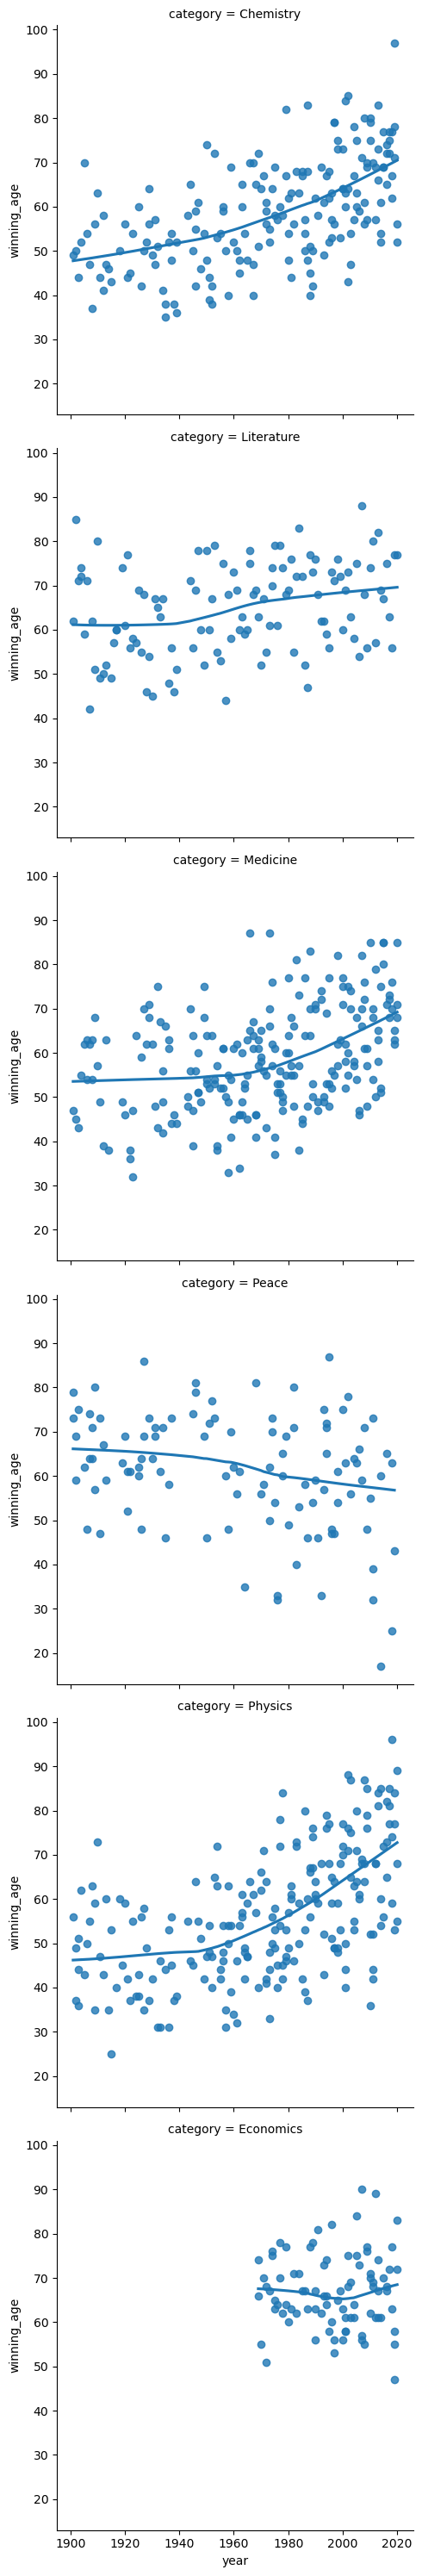

In [143]:
sns.lmplot(data=df_data,
            x='year',
            y='winning_age',
            row='category',
            lowess=True
            
)

Which category has the age trending up and which category has the age trending down?
## trending up
Physics Chemistry medicine
## trending down
Peace

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



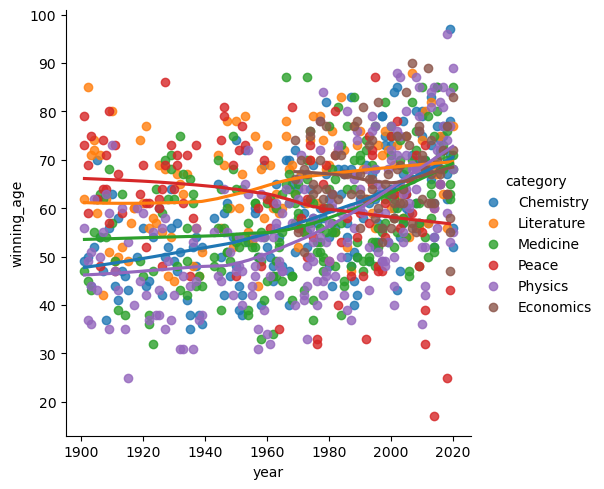

In [144]:
# Create a third chart with Seaborn. This time use .lmplot() to put all 6 categories on the same chart using the hue parameter.
sns.lmplot(data=df_data,
            x='year',
            y='winning_age',
            hue='category',
            lowess=True
            
)